<h1 align='center'>CNN for MNIST digit recognition</h1>
<h1 align='center'>Đỗ Trọng Khánh - 19521676</h1>

# Building a CNN model

In [31]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Add
from keras.models import load_model, Model
from keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt

class MiniResNet:
    def __init__(self):
        self.model = None
    def build(self, input_dim):
        input = Input(shape = input_dim)
        C1 = Conv2D(8, (3, 3), padding="same", activation = None)(input)
        P1 = MaxPooling2D(pool_size=(2,2), padding="same", strides=(2, 2))(C1)

        C2 = Conv2D(8, (3, 3), padding="same", activation="relu")(P1)
        C3 = Conv2D(8, (3, 3), padding="same", activation="relu")(C2)

        skip1 = Add()([P1, C3])

        C4 = Conv2D(16, (3, 3), padding="same", activation="relu", strides=(2, 2))(skip1)

        C5 = Conv2D(16, (3, 3), padding="same", activation="relu")(C4)
        C6 = Conv2D(16, (3, 3), padding="same", activation="relu")(C5)

        skip2 = Add()([C4, C6])

        P2 = AveragePooling2D(pool_size=(2,2), padding="same", strides=(1, 1))(skip2)

        flat = Flatten()(P2)
        F400 = Dense(400, activation="sigmoid")(flat)
        output = Dense(10, activation="softmax")(F400)

        self.model = Model(input, output)
        self.model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    def train(self, x_train, y_train):
        self.model.fit(x_train, y_train, validation_split=0.2, epochs = 50, batch_size=64, verbose=1)
    
    def load(self, model_file):
        self.model = load_model(model_file)

    def save(self, model_file):
        self.model.save(model_file)

    def summary(self):
        self.model.summary()
    
    def predict(self, x_test):
        return self.model.predict(x_test)


# Load Dataset MNIST

In [32]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Data Normalization

In [33]:
import numpy as np

def onehot(y):
    oh = np.zeros((y.shape[0], 10))
    for i in range(y.shape[0]):
        oh[i, int(y[i])] = 1
    return oh

In [34]:
from sklearn import preprocessing
import numpy as np

y_train_oh = onehot(y_train)
y_train_oh.shape

y_test_oh = onehot(y_test)
y_test_oh.shape

x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

x_train_norm = x_train_norm[:,:,:,np.newaxis]
x_test_norm = x_test_norm[:,:,:,np.newaxis]

# Trainning and Evaluate Model

In [35]:
cnn = MiniResNet()
cnn.build((28, 28, 1))
cnn.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_24 (Conv2D)             (None, 28, 28, 8)    80          ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 14, 14, 8)   0           ['conv2d_24[0][0]']              
                                                                                                  
 conv2d_25 (Conv2D)             (None, 14, 14, 8)    584         ['max_pooling2d_4[0][0]']        
                                                                                            

In [36]:
cnn.train(x_train_norm, y_train_oh)

Epoch 1/50
750/750 [==============================] - 8s 10ms/step - loss: 0.2702 - accuracy: 0.9142 - val_loss: 0.1196 - val_accuracy: 0.9634
Epoch 2/50
750/750 [==============================] - 7s 9ms/step - loss: 0.0860 - accuracy: 0.9726 - val_loss: 0.0701 - val_accuracy: 0.9799
Epoch 3/50
750/750 [==============================] - 7s 9ms/step - loss: 0.0630 - accuracy: 0.9801 - val_loss: 0.0594 - val_accuracy: 0.9832
Epoch 4/50
750/750 [==============================] - 7s 9ms/step - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0.0587 - val_accuracy: 0.9813
Epoch 5/50
750/750 [==============================] - 7s 10ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0490 - val_accuracy: 0.9846
Epoch 6/50
750/750 [==============================] - 7s 10ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0521 - val_accuracy: 0.9856
Epoch 7/50
750/750 [==============================] - 7s 10ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0449 - val_accuracy: 0.9869
Ep

In [37]:
pred = cnn.predict(x_test_norm)

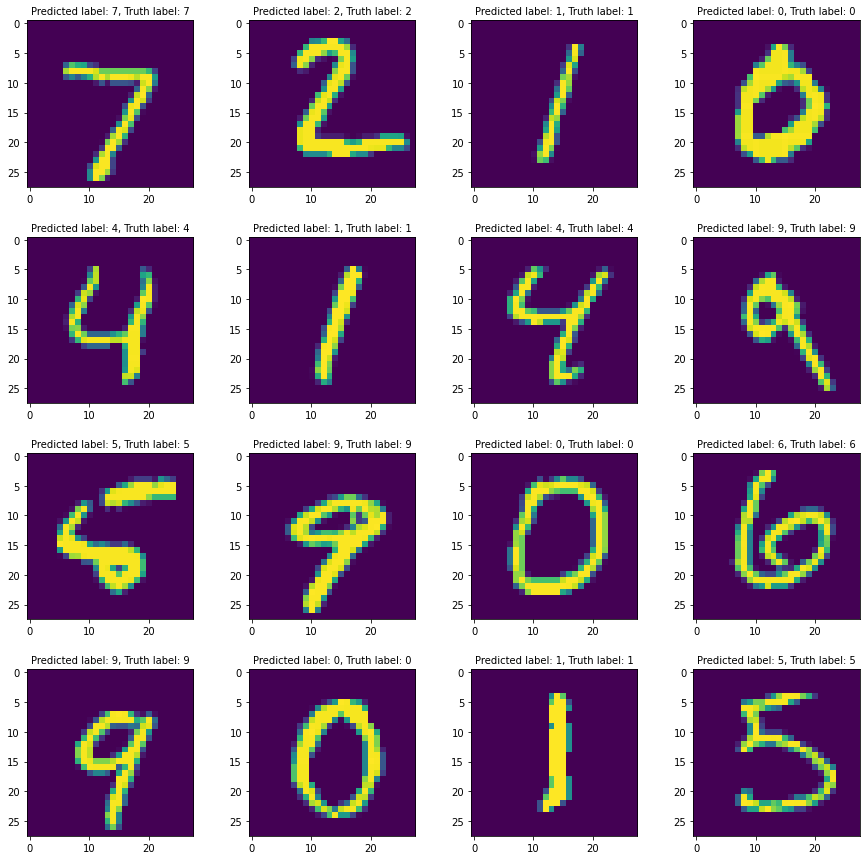

In [38]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    label_pred = "Predicted label: " + str(np.argmax(pred[i])) + ", Truth label: " + str(y_test[i])
    plt.title(label_pred, fontsize=10)
    plt.imshow(x_test[i])